### The linear algebra of dense layers
There are two ways to define a dense layer in tensorflow. The first involves the use of low-level, linear algebraic operations. The second makes use of high-level keras operations. In this exercise, we will use the first method to construct the network shown in the image below.
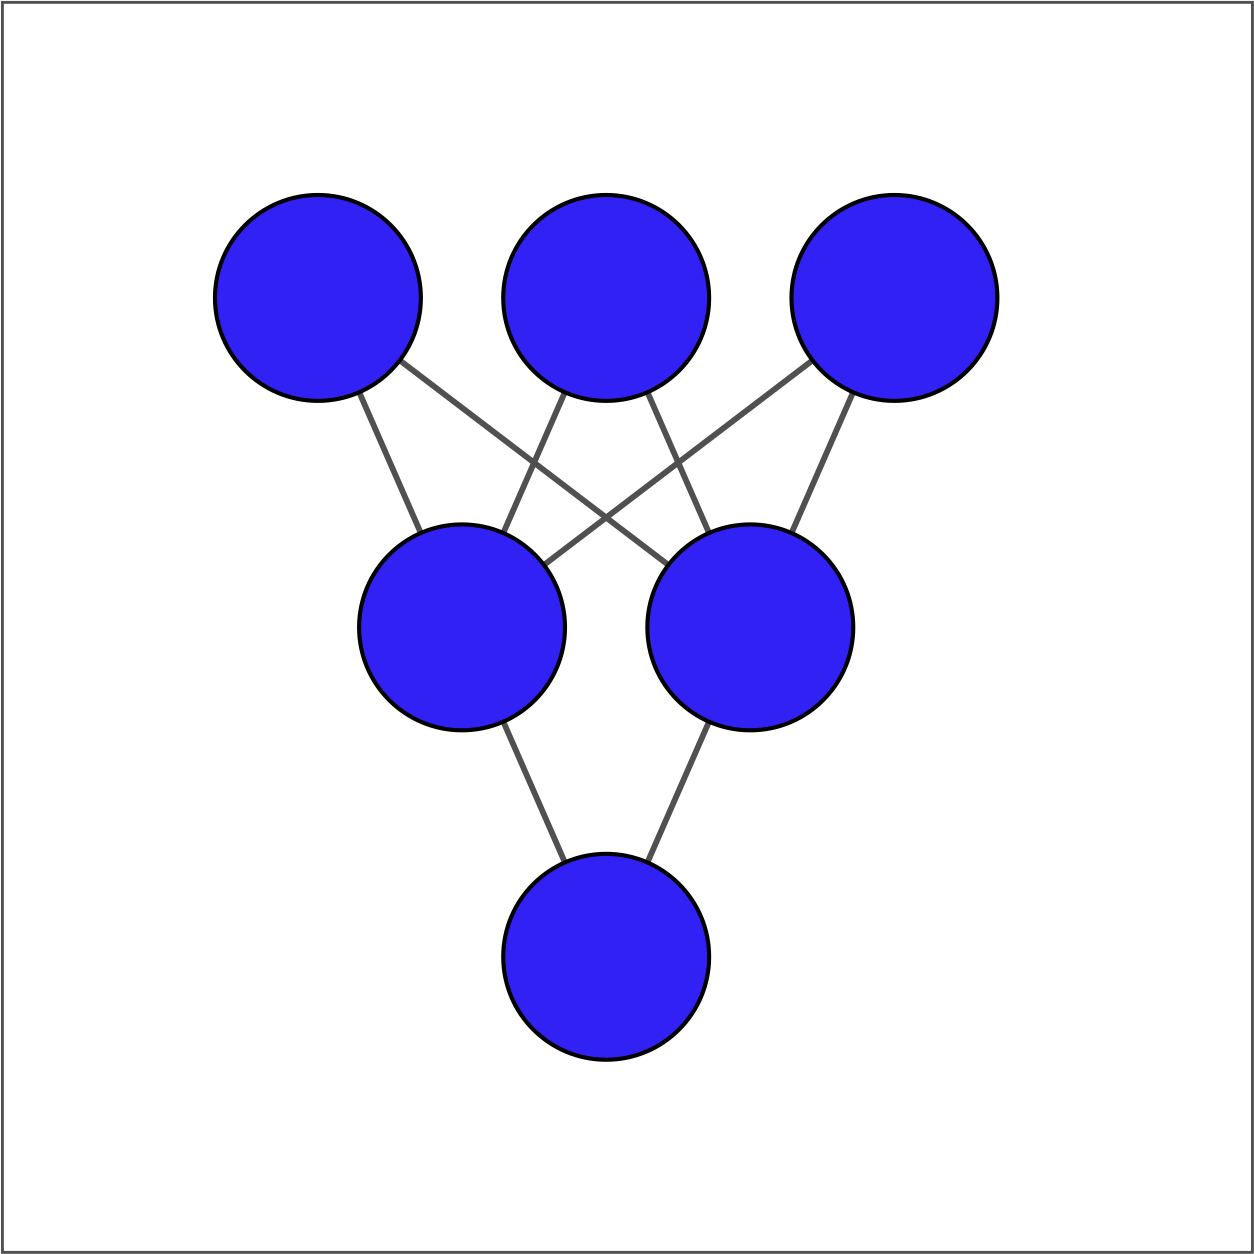

This image depicts an neural network with 5 input nodes and 3 output nodes.
The input layer contains 3 features -- education, marital status, and age -- which are available as borrower_features. The hidden layer contains 2 nodes and the output layer contains a single node.

For each layer, you will take the previous layer as an input, initialize a set of weights, compute the product of the inputs and weights, and then apply an activation function. Note that Variable(), ones(), matmul(), and keras() have been imported from tensorflow.

In [24]:
import numpy as np
import tensorflow as tf
from tensorflow import constant, Variable , ones , matmul, keras
borrower_features_array = np.array([[ 2.,  2., 43.]],np.float32)

# Convert the credit_numpy array into a tensorflow constant
borrower_features = Variable(borrower_features_array)
print(borrower_features)

<tf.Variable 'Variable:0' shape=(1, 3) dtype=float32, numpy=array([[ 2.,  2., 43.]], dtype=float32)>


In [27]:
# From previous step
bias1 = Variable(1.0)
weights1 = Variable(ones((3, 2)))
product1 = matmul(borrower_features, weights1)
dense1 = keras.activations.sigmoid(product1 + bias1)

# Initialize bias2 and weights2
bias2 = Variable(1.0)
weights2 = Variable(ones((2,1)))

# Perform matrix multiplication of dense1 and weights2
product2 = matmul(dense1,weights2)

# Apply activation to product2 + bias2 and print the prediction
prediction = keras.activations.sigmoid(product2 + bias2)
print('\n prediction: {}'.format(prediction.numpy()[0,0]))
print('\n actual: 1')


 prediction: 0.9525741338729858

 actual: 1


### The low-level approach with multiple examples
In this exercise, we'll build further intuition for the low-level approach by constructing the first dense hidden layer for the case where we have multiple examples. We'll assume the model is trained and the first layer weights, weights1, and bias, bias1, are available. We'll then perform matrix multiplication of the borrower_features tensor by the weights1 variable. Recall that the borrower_features tensor includes education, marital status, and age. Finally, we'll apply the sigmoid function to the elements of products1 + bias1, yielding dense1.

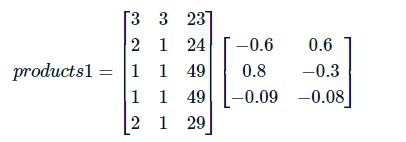

Note that matmul() and keras() have been imported from tensorflow
 
 


In [29]:
# Note using values from code above, not the explanation

# Compute the product of borrower_features and weights1
products1 = matmul(borrower_features,weights1)

# Apply a sigmoid activation function to products1 + bias1
dense1 = keras.activations.sigmoid(products1+bias1)

# Print the shapes of borrower_features, weights1, bias1, and dense1
print('\n shape of borrower_features: ', borrower_features.shape)
print('\n shape of weights1: ', weights1.shape)
print('\n shape of bias1: ', bias1.shape)
print('\n shape of dense1: ', dense1.shape)


 shape of borrower_features:  (1, 3)

 shape of weights1:  (3, 2)

 shape of bias1:  ()

 shape of dense1:  (1, 2)


### Using the dense layer operation
We've now seen how to define dense layers in tensorflow using linear algebra. In this exercise, we'll skip the linear algebra and let keras work out the details. This will allow us to construct the network below, which has 2 hidden layers and 10 features, using less code than we needed for the network with 1 hidden layer and 3 features.

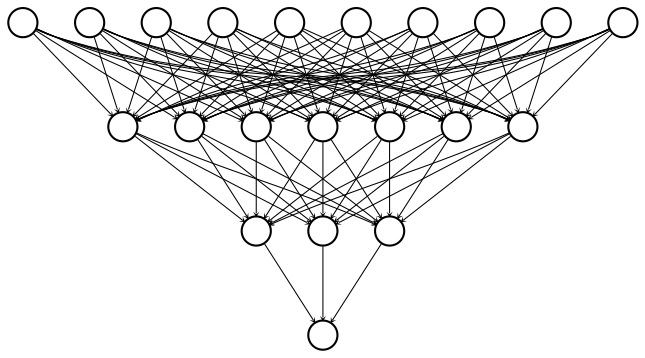

To construct this network, we'll need to define three dense layers, each of which takes the previous layer as an input, multiplies it by weights, and applies an activation function. Note that input data has been defined and is available as a 100x10 tensor: borrower_features. Additionally, the keras.layers module is available.

In [31]:
borrower_features_array = np.array([[6.96469188e-01, 2.86139339e-01, 2.26851448e-01, 5.51314771e-01,
        7.19468951e-01, 4.23106462e-01, 9.80764210e-01, 6.84829712e-01,
        4.80931908e-01, 3.92117530e-01],
       [3.43178004e-01, 7.29049683e-01, 4.38572258e-01, 5.96778952e-02,
        3.98044258e-01, 7.37995386e-01, 1.82491735e-01, 1.75451756e-01,
        5.31551361e-01, 5.31827569e-01],
       [6.34400964e-01, 8.49431813e-01, 7.24455297e-01, 6.11023486e-01,
        7.22443402e-01, 3.22958916e-01, 3.61788660e-01, 2.28263229e-01,
        2.93714046e-01, 6.30976140e-01],
       [9.21049416e-02, 4.33701187e-01, 4.30862755e-01, 4.93685097e-01,
        4.25830305e-01, 3.12261224e-01, 4.26351309e-01, 8.93389165e-01,
        9.44160044e-01, 5.01836658e-01],
       [6.23952925e-01, 1.15618393e-01, 3.17285478e-01, 4.14826214e-01,
        8.66309166e-01, 2.50455379e-01, 4.83034253e-01, 9.85559762e-01,
        5.19485116e-01, 6.12894535e-01],
       [1.20628662e-01, 8.26340795e-01, 6.03060126e-01, 5.45068026e-01,
        3.42763841e-01, 3.04120779e-01, 4.17022198e-01, 6.81300759e-01,
        8.75456870e-01, 5.10422349e-01],
       [6.69313788e-01, 5.85936546e-01, 6.24903500e-01, 6.74689054e-01,
        8.42342436e-01, 8.31949860e-02, 7.63682842e-01, 2.43666381e-01,
        1.94222957e-01, 5.72456956e-01],
       [9.57125202e-02, 8.85326803e-01, 6.27248943e-01, 7.23416328e-01,
        1.61292069e-02, 5.94431877e-01, 5.56785166e-01, 1.58959642e-01,
        1.53070509e-01, 6.95529521e-01],
       [3.18766415e-01, 6.91970289e-01, 5.54383278e-01, 3.88950586e-01,
        9.25132513e-01, 8.41669977e-01, 3.57397556e-01, 4.35914621e-02,
        3.04768085e-01, 3.98185670e-01],
       [7.04958856e-01, 9.95358467e-01, 3.55914861e-01, 7.62547791e-01,
        5.93176901e-01, 6.91701770e-01, 1.51127458e-01, 3.98876280e-01,
        2.40855902e-01, 3.43456000e-01],
       [5.13128161e-01, 6.66624546e-01, 1.05908483e-01, 1.30894944e-01,
        3.21980596e-01, 6.61564350e-01, 8.46506238e-01, 5.53257346e-01,
        8.54452491e-01, 3.84837806e-01],
       [3.16787899e-01, 3.54264677e-01, 1.71081826e-01, 8.29112649e-01,
        3.38670850e-01, 5.52370071e-01, 5.78551471e-01, 5.21533072e-01,
        2.68806447e-03, 9.88345444e-01],
       [9.05341566e-01, 2.07635865e-01, 2.92489409e-01, 5.20010173e-01,
        9.01911378e-01, 9.83630896e-01, 2.57542074e-01, 5.64359069e-01,
        8.06968689e-01, 3.94370049e-01],
       [7.31073022e-01, 1.61069021e-01, 6.00698590e-01, 8.65864456e-01,
        9.83521581e-01, 7.93657899e-02, 4.28347290e-01, 2.04542860e-01,
        4.50636476e-01, 5.47763586e-01],
       [9.33267102e-02, 2.96860784e-01, 9.27584231e-01, 5.69003761e-01,
        4.57412004e-01, 7.53525972e-01, 7.41862178e-01, 4.85790335e-02,
        7.08697379e-01, 8.39243352e-01],
       [1.65937886e-01, 7.80997932e-01, 2.86536604e-01, 3.06469738e-01,
        6.65261447e-01, 1.11392170e-01, 6.64872468e-01, 8.87856781e-01,
        6.96311295e-01, 4.40327883e-01],
       [4.38214391e-01, 7.65096068e-01, 5.65641999e-01, 8.49041641e-02,
        5.82671106e-01, 8.14843714e-01, 3.37066382e-01, 9.27576602e-01,
        7.50716984e-01, 5.74063838e-01],
       [7.51644015e-01, 7.91489631e-02, 8.59389067e-01, 8.21504116e-01,
        9.09871638e-01, 1.28631204e-01, 8.17800835e-02, 1.38415575e-01,
        3.99378717e-01, 4.24306870e-01],
       [5.62218368e-01, 1.22243546e-01, 2.01399505e-01, 8.11644375e-01,
        4.67987567e-01, 8.07938218e-01, 7.42637832e-03, 5.51592708e-01,
        9.31932151e-01, 5.82175434e-01],
       [2.06095725e-01, 7.17757583e-01, 3.78985852e-01, 6.68383956e-01,
        2.93197222e-02, 6.35900378e-01, 3.21979336e-02, 7.44780660e-01,
        4.72912997e-01, 1.21754356e-01],
       [5.42635918e-01, 6.67744428e-02, 6.53364897e-01, 9.96086299e-01,
        7.69397318e-01, 5.73774099e-01, 1.02635257e-01, 6.99834049e-01,
        6.61167860e-01, 4.90971319e-02],
       [7.92299330e-01, 5.18716574e-01, 4.25867707e-01, 7.88187146e-01,
        4.11569238e-01, 4.81026262e-01, 1.81628838e-01, 3.21318895e-01,
        8.45533013e-01, 1.86903745e-01],
       [4.17291075e-01, 9.89034534e-01, 2.36599818e-01, 9.16832328e-01,
        9.18397486e-01, 9.12963450e-02, 4.63652730e-01, 5.02216339e-01,
        3.13668936e-01, 4.73395362e-02],
       [2.41685644e-01, 9.55296382e-02, 2.38249913e-01, 8.07791114e-01,
        8.94978285e-01, 4.32228930e-02, 3.01946849e-01, 9.80582178e-01,
        5.39504826e-01, 6.26309335e-01],
       [5.54540846e-03, 4.84909445e-01, 9.88328516e-01, 3.75185519e-01,
        9.70381573e-02, 4.61908758e-01, 9.63004470e-01, 3.41830611e-01,
        7.98922718e-01, 7.98846304e-01],
       [2.08248302e-01, 4.43367690e-01, 7.15601265e-01, 4.10519779e-01,
        1.91006958e-01, 9.67494309e-01, 6.50750339e-01, 8.65459859e-01,
        2.52423584e-02, 2.66905814e-01],
       [5.02071083e-01, 6.74486384e-02, 9.93033290e-01, 2.36462399e-01,
        3.74292195e-01, 2.14011908e-01, 1.05445869e-01, 2.32479781e-01,
        3.00610125e-01, 6.34442270e-01],
       [2.81234771e-01, 3.62276763e-01, 5.94284385e-03, 3.65719140e-01,
        5.33885956e-01, 1.62015840e-01, 5.97433090e-01, 2.93152481e-01,
        6.32050514e-01, 2.61966046e-02],
       [8.87593448e-01, 1.61186308e-02, 1.26958027e-01, 7.77162433e-01,
        4.58952338e-02, 7.10998714e-01, 9.71046150e-01, 8.71682942e-01,
        7.10161626e-01, 9.58509743e-01],
       [4.29813325e-01, 8.72878909e-01, 3.55957657e-01, 9.29763675e-01,
        1.48777649e-01, 9.40029025e-01, 8.32716227e-01, 8.46054852e-01,
        1.23923011e-01, 5.96486926e-01],
       [1.63924806e-02, 7.21184373e-01, 7.73751410e-03, 8.48222747e-02,
        2.25498408e-01, 8.75124514e-01, 3.63576323e-01, 5.39959908e-01,
        5.68103194e-01, 2.25463361e-01],
       [5.72146773e-01, 6.60951793e-01, 2.98245400e-01, 4.18626845e-01,
        4.53088939e-01, 9.32350636e-01, 5.87493777e-01, 9.48252380e-01,
        5.56034744e-01, 5.00561416e-01],
       [3.53221106e-03, 4.80889052e-01, 9.27455008e-01, 1.98365688e-01,
        5.20911328e-02, 4.06778902e-01, 3.72396469e-01, 8.57153058e-01,
        2.66111158e-02, 9.20149207e-01],
       [6.80903018e-01, 9.04226005e-01, 6.07529044e-01, 8.11953306e-01,
        3.35543871e-01, 3.49566221e-01, 3.89874220e-01, 7.54797101e-01,
        3.69291186e-01, 2.42219806e-01],
       [9.37668383e-01, 9.08011079e-01, 3.48797321e-01, 6.34638071e-01,
        2.73842216e-01, 2.06115127e-01, 3.36339533e-01, 3.27099890e-01,
        8.82276118e-01, 8.22303832e-01],
       [7.09623218e-01, 9.59345222e-01, 4.22543347e-01, 2.45033041e-01,
        1.17398441e-01, 3.01053345e-01, 1.45263731e-01, 9.21861008e-02,
        6.02932215e-01, 3.64187449e-01],
       [5.64570367e-01, 1.91335723e-01, 6.76905870e-01, 2.15505451e-01,
        2.78023601e-01, 7.41760433e-01, 5.59737921e-01, 3.34836423e-01,
        5.42988777e-01, 6.93984687e-01],
       [9.12132144e-01, 5.80713212e-01, 2.32686386e-01, 7.46697605e-01,
        7.77769029e-01, 2.00401321e-01, 8.20574224e-01, 4.64934856e-01,
        7.79766679e-01, 2.37478226e-01],
       [3.32580268e-01, 9.53697145e-01, 6.57815099e-01, 7.72877812e-01,
        6.88374341e-01, 2.04304114e-01, 4.70688760e-01, 8.08963895e-01,
        6.75035119e-01, 6.02788571e-03],
       [8.74077454e-02, 3.46794724e-01, 9.44365561e-01, 4.91190493e-01,
        2.70176262e-01, 3.60423714e-01, 2.10652635e-01, 4.21200067e-01,
        2.18035445e-01, 8.45752478e-01],
       [4.56270605e-01, 2.79802024e-01, 9.32891667e-01, 3.14351350e-01,
        9.09714639e-01, 4.34180908e-02, 7.07115054e-01, 4.83889043e-01,
        4.44221050e-01, 3.63233462e-02],
       [4.06831913e-02, 3.32753628e-01, 9.47119534e-01, 6.17659986e-01,
        3.68874848e-01, 6.11977041e-01, 2.06131533e-01, 1.65066436e-01,
        3.61817271e-01, 8.63353372e-01],
       [5.09401739e-01, 2.96901524e-01, 9.50251639e-01, 8.15966070e-01,
        3.22973937e-01, 9.72098231e-01, 9.87351120e-01, 4.08660144e-01,
        6.55923128e-01, 4.05653208e-01],
       [2.57348120e-01, 8.26526731e-02, 2.63610333e-01, 2.71479845e-01,
        3.98639083e-01, 1.84886038e-01, 9.53818381e-01, 1.02879882e-01,
        6.25208557e-01, 4.41697389e-01],
       [4.23518062e-01, 3.71991783e-01, 8.68314683e-01, 2.80476987e-01,
        2.05761567e-02, 9.18097019e-01, 8.64480257e-01, 2.76901782e-01,
        5.23487568e-01, 1.09088197e-01],
       [9.34270695e-02, 8.37466121e-01, 4.10265714e-01, 6.61716521e-01,
        9.43200588e-01, 2.45130599e-01, 1.31598311e-02, 2.41484065e-02,
        7.09385693e-01, 9.24551904e-01],
       [4.67330277e-01, 3.75109136e-01, 5.42860448e-01, 8.58916819e-01,
        6.52153850e-01, 2.32979894e-01, 7.74580181e-01, 1.34613499e-01,
        1.65559977e-01, 6.12682283e-01],
       [2.38783404e-01, 7.04778552e-01, 3.49518538e-01, 2.77423948e-01,
        9.98918414e-01, 4.06161249e-02, 6.45822525e-01, 3.86995859e-02,
        7.60210276e-01, 2.30089962e-01],
       [8.98318663e-02, 6.48449719e-01, 7.32601225e-01, 6.78095341e-01,
        5.19009456e-02, 2.94306934e-01, 4.51088339e-01, 2.87103295e-01,
        8.10513437e-01, 1.31115109e-01],
       [6.12179339e-01, 9.88214970e-01, 9.02556539e-01, 2.22157061e-01,
        8.18876142e-05, 9.80597317e-01, 8.82712960e-01, 9.19472456e-01,
        4.15503561e-01, 7.44615436e-01],
       [2.12831497e-01, 3.92304063e-01, 8.51548076e-01, 1.27612218e-01,
        8.93865347e-01, 4.96507972e-01, 4.26095665e-01, 3.05646390e-01,
        9.16848779e-01, 5.17623484e-01],
       [8.04026365e-01, 8.57651770e-01, 9.22382355e-01, 3.03380728e-01,
        3.39810848e-01, 5.95073879e-01, 4.41324145e-01, 9.32842553e-01,
        3.97564054e-01, 4.77778047e-01],
       [6.17186069e-01, 4.04739499e-01, 9.92478430e-01, 9.88512859e-02,
        2.20603317e-01, 3.22655141e-01, 1.47722840e-01, 2.84219235e-01,
        7.79245317e-01, 5.22891998e-01],
       [3.39536369e-02, 9.82622564e-01, 6.16006494e-01, 5.89394793e-02,
        6.61168754e-01, 3.78369361e-01, 1.35673299e-01, 5.63664615e-01,
        7.27079928e-01, 6.71126604e-01],
       [2.47513160e-01, 5.24866223e-01, 5.37663460e-01, 7.16803372e-01,
        3.59867334e-01, 7.97732592e-01, 6.27921820e-01, 3.83316055e-02,
        5.46479046e-01, 8.61912072e-01],
       [5.67574143e-01, 1.75828263e-01, 5.10376394e-01, 7.56945848e-01,
        1.10105194e-01, 8.17099094e-01, 1.67481646e-01, 5.34076512e-01,
        3.85743469e-01, 2.48623773e-01],
       [6.47432506e-01, 3.73921096e-02, 7.60045826e-01, 5.26940644e-01,
        8.75771224e-01, 5.20718336e-01, 3.50331701e-02, 1.43600971e-01,
        7.95604587e-01, 4.91976053e-01],
       [4.41879272e-01, 3.18434775e-01, 2.84549206e-01, 9.65886295e-01,
        4.32969332e-01, 8.84003043e-01, 6.48163140e-01, 8.58427644e-01,
        8.52449536e-01, 9.56312001e-01],
       [6.97942257e-01, 8.05396914e-01, 7.33127892e-01, 6.05226815e-01,
        7.17354119e-01, 7.15750396e-01, 4.09077927e-02, 5.16110837e-01,
        7.92651355e-01, 2.42962182e-01],
       [4.65147972e-01, 4.34985697e-01, 4.02787179e-01, 1.21839531e-01,
        5.25711536e-01, 4.46248353e-01, 6.63392782e-01, 5.49413085e-01,
        2.75429301e-02, 3.19179893e-02],
       [7.01359808e-01, 7.07581103e-01, 9.59939122e-01, 8.76704693e-01,
        4.68059659e-01, 6.25906527e-01, 4.57181722e-01, 2.22946241e-01,
        3.76677006e-01, 1.03884235e-01],
       [6.66527092e-01, 1.92030147e-01, 4.75467801e-01, 9.67436612e-01,
        3.16689312e-02, 1.51729956e-01, 2.98579186e-01, 9.41806972e-01,
        9.08841789e-01, 1.62000835e-01],
       [9.81117785e-01, 7.50747502e-01, 5.39977074e-01, 9.31702912e-01,
        8.80607128e-01, 3.91316503e-01, 6.56343222e-01, 6.47385120e-01,
        3.26968193e-01, 1.79390177e-01],
       [4.66809869e-01, 2.63281047e-01, 3.55065137e-01, 9.54143941e-01,
        4.61137861e-01, 6.84891462e-01, 3.36229891e-01, 9.95861053e-01,
        6.58767581e-01, 1.96009472e-01],
       [9.81839970e-02, 9.43180561e-01, 9.44777846e-01, 6.21328354e-01,
        1.69914998e-02, 2.25534886e-01, 8.01276803e-01, 8.75459850e-01,
        4.53989804e-01, 3.65520626e-01],
       [2.74224997e-01, 1.16970517e-01, 1.15744539e-01, 9.52602684e-01,
        8.08626115e-01, 1.64779365e-01, 2.07050055e-01, 6.55551553e-01,
        7.64664233e-01, 8.10314834e-01],
       [1.63337693e-01, 9.84128296e-01, 2.27802068e-01, 5.89415431e-01,
        5.87615728e-01, 9.67361867e-01, 6.57667458e-01, 5.84904253e-01,
        5.18772602e-01, 7.64657557e-01],
       [1.06055260e-01, 2.09190114e-03, 9.52488840e-01, 4.98657674e-01,
        3.28335375e-01, 3.68053257e-01, 8.03843319e-01, 3.82370204e-01,
        7.70169199e-01, 4.40461993e-01],
       [8.44077468e-01, 7.62040615e-02, 4.81128335e-01, 4.66849715e-01,
        2.64327973e-01, 9.43614721e-01, 9.05028462e-01, 4.43596303e-01,
        9.71596092e-02, 2.06783146e-01],
       [2.71491826e-01, 4.84219760e-01, 3.38377118e-01, 7.74136066e-01,
        4.76026595e-01, 8.70370507e-01, 9.95781779e-01, 2.19835952e-01,
        6.11671388e-01, 8.47502291e-01],
       [9.45236623e-01, 2.90086418e-01, 7.27042735e-01, 1.50161488e-02,
        8.79142463e-01, 6.39385507e-02, 7.33395398e-01, 9.94610369e-01,
        5.01189768e-01, 2.09333986e-01],
       [5.94643593e-01, 6.24149978e-01, 6.68072760e-01, 1.72611743e-01,
        8.98712695e-01, 6.20991349e-01, 4.35687043e-02, 6.84041083e-01,
        1.96084052e-01, 2.73407809e-02],
       [5.50953269e-01, 8.13313663e-01, 8.59941125e-01, 1.03520922e-01,
        6.63042784e-01, 7.10075200e-01, 2.94516981e-01, 9.71364021e-01,
        2.78687477e-01, 6.99821860e-02],
       [5.19280374e-01, 6.94314897e-01, 2.44659781e-01, 3.38582188e-01,
        5.63627958e-01, 8.86678159e-01, 7.47325897e-01, 2.09591955e-01,
        2.51777083e-01, 5.23880661e-01],
       [7.68958688e-01, 6.18761778e-01, 5.01324296e-01, 5.97125351e-01,
        7.56060004e-01, 5.37079811e-01, 8.97752762e-01, 9.47067499e-01,
        9.15354490e-01, 7.54518330e-01],
       [2.46321008e-01, 3.85271460e-01, 2.79999942e-01, 6.57660246e-01,
        3.24221611e-01, 7.54391611e-01, 1.13509081e-01, 7.75364757e-01,
        5.85901976e-01, 8.35388660e-01],
       [4.30875659e-01, 6.24964476e-01, 5.54412127e-01, 9.75671291e-01,
        7.55474389e-01, 5.44813275e-01, 1.74032092e-01, 9.04114246e-01,
        2.05837786e-01, 6.50043249e-01],
       [9.36471879e-01, 2.23579630e-01, 2.25923538e-01, 8.51818919e-01,
        8.27655017e-01, 3.51703346e-01, 2.65096277e-01, 1.27388477e-01,
        9.87936080e-01, 8.35343122e-01],
       [8.99391592e-01, 5.13679326e-01, 1.14384830e-01, 5.25803380e-02,
        3.30582112e-01, 9.20330405e-01, 9.47581828e-01, 8.41163874e-01,
        1.58679143e-01, 4.19923156e-01],
       [2.46242926e-01, 2.05349773e-01, 6.84825838e-01, 4.86111671e-01,
        3.24909657e-01, 1.00214459e-01, 5.44763386e-01, 3.47025156e-01,
        3.91095817e-01, 3.10508728e-01],
       [3.87195200e-01, 5.55859566e-01, 1.41438060e-02, 8.47647011e-01,
        9.21919882e-01, 5.50529718e-01, 2.68021107e-01, 9.90239024e-01,
        3.83194029e-01, 6.93655372e-01],
       [6.89952552e-01, 4.34309065e-01, 1.99158162e-01, 9.66579378e-01,
        6.36908561e-02, 4.85149384e-01, 2.20730707e-01, 2.93974131e-01,
        8.28527331e-01, 3.67265552e-01],
       [8.33482668e-02, 1.96309000e-01, 8.60373437e-01, 9.77028847e-01,
        2.67982155e-01, 6.75408959e-01, 8.11989978e-02, 7.23465621e-01,
        4.16436613e-01, 9.18159902e-01],
       [3.11536163e-01, 9.41466987e-01, 5.03247440e-01, 3.48892927e-01,
        6.47019625e-01, 2.49746203e-01, 2.29763597e-01, 1.96346447e-01,
        9.59899545e-01, 4.92913723e-01],
       [7.51614988e-01, 4.73991871e-01, 5.87540150e-01, 5.84138989e-01,
        9.79886293e-01, 6.68433130e-01, 2.39769474e-01, 1.51976589e-02,
        2.18682140e-01, 4.55519646e-01],
       [3.93420339e-01, 8.12326252e-01, 7.85556734e-01, 8.90959650e-02,
        9.52010751e-01, 5.27456701e-01, 5.96403956e-01, 4.05056775e-01,
        6.49500966e-01, 8.71326327e-01],
       [6.73935950e-01, 9.70098555e-01, 7.01122224e-01, 8.21720719e-01,
        4.50395830e-02, 6.72698498e-01, 6.54752672e-01, 1.01746053e-01,
        8.42387497e-01, 6.14172399e-01],
       [9.83280912e-02, 5.94467103e-01, 4.78415847e-01, 2.33293563e-01,
        1.97560899e-02, 3.65567267e-01, 6.19851053e-01, 3.29279125e-01,
        3.07254642e-01, 7.51121223e-01],
       [7.58624673e-01, 7.18765855e-01, 1.01181954e-01, 5.16165972e-01,
        5.57798684e-01, 7.44804502e-01, 9.03177738e-01, 3.69038880e-01,
        4.28663462e-01, 7.32767463e-01],
       [6.62636399e-01, 5.57869911e-01, 3.50139618e-01, 1.95352346e-01,
        1.83807373e-01, 8.15832913e-02, 8.12008530e-02, 8.45798194e-01,
        3.83672744e-01, 6.07396215e-02],
       [8.96425664e-01, 2.23270476e-01, 2.68124431e-01, 1.94497839e-01,
        9.67501044e-01, 1.12540089e-01, 7.22163260e-01, 9.32088733e-01,
        6.68001294e-01, 8.58726621e-01],
       [2.42447108e-01, 6.73927963e-01, 7.00871348e-01, 4.58332509e-01,
        8.70545626e-01, 6.94386125e-01, 8.94877791e-01, 7.53204346e-01,
        5.20290434e-01, 4.98688221e-01],
       [4.53727633e-01, 2.16468628e-02, 5.35141408e-01, 4.22973245e-01,
        1.57533601e-01, 1.19069695e-01, 4.49351877e-01, 3.99130546e-02,
        9.86579895e-01, 3.78120929e-01],
       [3.82109195e-01, 5.11263013e-02, 4.26672339e-01, 1.57454368e-02,
        3.00936326e-02, 3.39099228e-01, 8.20968926e-01, 4.58821088e-01,
        1.48405796e-02, 1.63220033e-01],
       [7.39922702e-01, 7.38293707e-01, 7.54522920e-01, 3.51669371e-01,
        3.52276951e-01, 8.02075684e-01, 3.98137897e-01, 7.27191031e-01,
        5.81122994e-01, 3.64341676e-01],
       [8.00065175e-02, 1.16125375e-01, 8.89558733e-01, 4.52340513e-01,
        9.94004548e-01, 3.63896936e-01, 2.49954298e-01, 3.50539327e-01,
        3.43086094e-01, 6.37356758e-01],
       [1.27375638e-02, 7.63268650e-01, 4.16414618e-01, 4.32239205e-01,
        4.81115013e-01, 4.49212462e-01, 4.97470886e-01, 3.45904320e-01,
        4.53346133e-01, 4.04651344e-01],
       [5.18242717e-01, 6.23269081e-01, 2.41040602e-01, 5.08437157e-01,
        5.94621897e-01, 1.69483144e-02, 5.20493746e-01, 2.39293247e-01,
        4.04538542e-01, 8.26530159e-01],
       [3.26235592e-01, 4.83216912e-01, 2.47411542e-02, 3.08750868e-01,
        6.39721096e-01, 3.15161765e-01, 2.05797508e-01, 2.90655673e-01,
        9.54378307e-01, 8.68018195e-02],
       [4.63357776e-01, 5.83869033e-02, 5.38658261e-01, 1.46035731e-01,
        6.34084821e-01, 2.64397472e-01, 6.90915406e-01, 3.47146064e-01,
        4.16848855e-03, 2.94894695e-01]], np.float32)

borrower_features = Variable(borrower_features_array)

In [ ]:
# Define the first dense layer
dense1 = keras.layers.Dense(7, activation='sigmoid')(borrower_features)

# Define a dense layer with 3 output nodes
dense2 = keras.layers.Dense(3, activation='sigmoid')(dense1)

# Define a dense layer with 1 output node
predictions = keras.layers.Dense(1, activation='sigmoid')(dense2)

# Print the shapes of dense1, dense2, and predictions
print('\n shape of dense1: ', dense1.shape)
print('\n shape of dense2: ', dense2.shape)
print('\n shape of predictions: ', predictions.shape)

### Binary classification problems
In this exercise, you will again make use of credit card data. The target variable, default, indicates whether a credit card holder defaults on his or her payment in the following period. Since there are only two options--default or not--this is a binary classification problem. While the dataset has many features, you will focus on just three: the size of the three latest credit card bills. Finally, you will compute predictions from your untrained network, outputs, and compare those the target variable, default.

The tensor of features has been loaded and is available as bill_amounts. Additionally, the constant(), float32, and keras.layers.Dense() operations are available.

In [34]:
## Construct input layer from features
#inputs = constant(bill_amounts,float32)
#
## Define first dense layer
#dense1 = keras.layers.Dense(3, activation='relu')(inputs)
#
## Define second dense layer
#dense2 = keras.layers.Dense(2, activation='relu')(dense1)
#
## Define output layer
#outputs = keras.layers.Dense(1, activation='sigmoid')(dense2)
#
## Print error for first five examples
#error = default[:5] - outputs.numpy()[:5]
#print(error)

### Multiclass classification problems
In this exercise, we expand beyond binary classification to cover multiclass problems. A multiclass problem has targets that can take on three or more values. In the credit card dataset, the education variable can take on 6 different values, each corresponding to a different level of education. We will use that as our target in this exercise and will also expand the feature set from 3 to 10 columns.

As in the previous problem, you will define an input layer, dense layers, and an output layer. You will also print the untrained model's predictions, which are probabilities assigned to the classes. The tensor of features has been loaded and is available as borrower_features. Additionally, the constant(), float32, and keras.layers.Dense() operations are available.

In [35]:
## Construct input layer from borrower features
#inputs = constant(borrower_features,float32)
#
## Define first dense layer
#dense1 = keras.layers.Dense(10, activation='sigmoid')(inputs)
#
## Define second dense layer
#dense2 = keras.layers.Dense(8, activation='relu')(dense1)
#
## Define output layer
#outputs = keras.layers.Dense(6, activation='softmax')(dense2)
#
## Print first five predictions
#print(outputs.numpy()[:5])

### The dangers of local minima
Consider the plot of the following loss function, loss_function(), which contains a global minimum, marked by the dot on the right, and several local minima, including the one marked by the dot on the left.
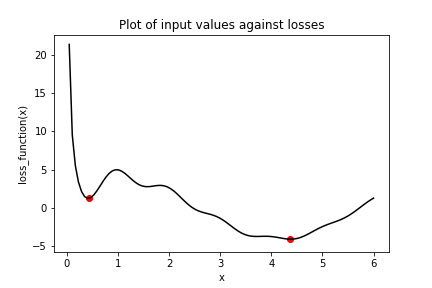
In this exercise, you will try to find the global minimum of loss_function() using keras.optimizers.SGD(). You will do this twice, each time with a different initial value of the input to loss_function(). First, you will use x_1, which is a variable with an initial value of 6.0. Second, you will use x_2, which is a variable with an initial value of 0.3. Note that loss_function() has been defined and is available.

In [36]:
## Initialize x_1 and x_2
#x_1 = Variable(6.0,float32)
#x_2 = Variable(0.3,float32)
#
## Define the optimization operation
#opt = keras.optimizers.SGD(learning_rate=0.01)
#
#for j in range(100):
#	# Perform minimization using the loss function and x_1
#	opt.minimize(lambda: loss_function(x_1), var_list=[x_1])
#	# Perform minimization using the loss function and x_2
#	opt.minimize(lambda: loss_function(x_2), var_list=[x_2])
#
## Print x_1 and x_2 as numpy arrays
#print(x_1.numpy(), x_2.numpy())

### Avoiding local minima
The previous problem showed how easy it is to get stuck in local minima. We had a simple optimization problem in one variable and gradient descent still failed to deliver the global minimum when we had to travel through local minima first. One way to avoid this problem is to use momentum, which allows the optimizer to break through local minima. We will again use the loss function from the previous problem, which has been defined and is available for you as loss_function().
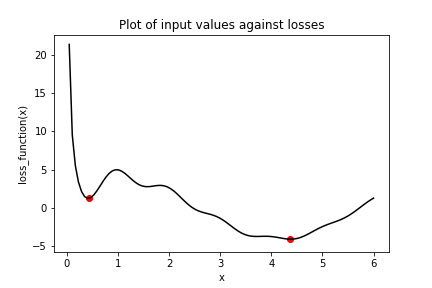
Several optimizers in tensorflow have a momentum parameter, including SGD and RMSprop. You will make use of RMSprop in this exercise. Note that x_1 and x_2 have been initialized to the same value this time. Furthermore, keras.optimizers.RMSprop() has also been imported for you from tensorflow.

In [37]:
## Initialize x_1 and x_2
#x_1 = Variable(0.05,float32)
#x_2 = Variable(0.05,float32)
#
## Define the optimization operation for opt_1 and opt_2
#opt_1 = keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.99)
#opt_2 = keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.00)
#
#for j in range(100):
#	opt_1.minimize(lambda: loss_function(x_1), var_list=[x_1])
#    # Define the minimization operation for opt_2
#	opt_2.minimize(lambda: loss_function(x_2), var_list=[x_2])
#
## Print x_1 and x_2 as numpy arrays
#print(x_1,x_2)

### Initialization in TensorFlow
A good initialization can reduce the amount of time needed to find the global minimum. In this exercise, we will initialize weights and biases for a neural network that will be used to predict credit card default decisions. To build intuition, we will use the low-level, linear algebraic approach, rather than making use of convenience functions and high-level keras operations. We will also expand the set of input features from 3 to 23. Several operations have been imported from tensorflow: Variable(), random(), and ones().

In [39]:
# Define the layer 1 weights
w1 = Variable(tf.random.normal([23, 7]))

# Initialize the layer 1 bias
b1 = Variable(ones([7]))

# Define the layer 2 weights
w2 = Variable(tf.random.normal([7, 1]))

# Define the layer 2 bias
b2 = Variable(0.0)

### Defining the model and loss function
In this exercise, you will train a neural network to predict whether a credit card holder will default. The features and targets you will use to train your network are available in the Python shell as borrower_features and default. You defined the weights and biases in the previous exercise.

Note that the predictions layer is defined as , where  is the sigmoid activation, layer1 is a tensor of nodes for the first hidden dense layer, w2 is a tensor of weights, and b2 is the bias tensor.

The trainable variables are w1, b1, w2, and b2. Additionally, the following operations have been imported for you: keras.activations.relu() and keras.layers.Dropout().

In [41]:
## Define the model
#def model(w1, b1, w2, b2, features = borrower_features):
#	# Apply relu activation functions to layer 1
#	layer1 = keras.activations.relu(matmul(features, w1) + b1)
#    # Apply dropout
#	dropout = keras.layers.Dropout(0.25)(layer1)
#	return keras.activations.sigmoid(matmul(dropout, w2) + b2)
#
## Define the loss function
#def loss_function(w1, b1, w2, b2, features = borrower_features, targets = default):
#	predictions = model(w1, b1, w2, b2)
#	# Pass targets and predictions to the cross entropy loss
#	return keras.losses.binary_crossentropy(targets, predictions)

### Training neural networks with TensorFlow
In the previous exercise, you defined a model, model(w1, b1, w2, b2, features), and a loss function, loss_function(w1, b1, w2, b2, features, targets), both of which are available to you in this exercise. You will now train the model and then evaluate its performance by predicting default outcomes in a test set, which consists of test_features and test_targets and is available to you. The trainable variables are w1, b1, w2, and b2. Additionally, the following operations have been imported for you: keras.activations.relu() and keras.layers.Dropout().

In [42]:
## Train the model
#for j in range(100):
#    # Complete the optimizer
#	opt.minimize(lambda: loss_function(w1, b1, w2, b2), 
#                 var_list=[w1, b1, w2, b2])
#
## Make predictions with model
#model_predictions = model(w1, b1, w2, b2, test_features)
#
## Construct the confusion matrix
#confusion_matrix(test_targets, model_predictions)